# 서울의 스타벅스와 이디야 매장 위치분석

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from plotnine import *


Bad key "'font.family" on line 623 in
C:\Users\seoyu\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [10]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font', family = 'NanumGothic')
set_matplotlib_formats('retina')

In [11]:
shop = pd.read_csv('data\store_location\상권(상가)정보_201912_(1)서울,부산.csv',
                   encoding = 'cp949')
shop.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                       건물관리번호       건물명  \
0    Q09A01        호프/맥주   I56219  ...  "1168010600106040000014378"      대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  "1168010100106960042022041"       NaN   
2    Q09A01        호프/맥주   I56219  ...  "1154510200101620001017748"       NaN   
3    Q07A10        토스트전문   I56192  ...  "2653010400105780000002037"  산업용품유통상가   
4    F09A02   사우나/증기탕/온천   S96121  ...  "1171010500102560005010490"       NaN   

                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보                  경도  \
0  서울특별시 강남구 남부순환로 2933  135280  "06280"  NaN   1  NaN  "127.061026050567"   
1    서울특별시 강남구 선릉로93길 6  135080  "06149"  NaN   1  NaN  "127.047883157395"   
2    서울특별시 금천구 가산로 34-6  153010  "08545"  NaN   1  NaN  "126.899220370682"   
3      부산광역시 사상구 괘감로 37  617726  "46977"  NaN   1   26  "128.980455279266"   
4      서울특별시 송파구 가락로 71  138846  "05690"  NaN   1  NaN  "127.104070564081"   

                   위도  
0  "37.4939223326479"  
1   "37.505675040058"  
2  "37.4717112331268"  
3  "35.1597741758499"  
4  "37.5002486691845"  

[5 rows x 39 columns]

* 상권정보 중 서울지역의 정보만을 df_seoul에 저장한다

In [12]:
df_seoul = shop[shop['도로명주소'].str.contains('서울')]
df_seoul.shape

(407376, 39)

* 이디야와 스타벅스의 정보를 df_cafe에 저장한다

In [13]:
# starbucks
df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS')]

# ediya
df_seoul[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA')]

상가업소번호    상호명        지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1675    25435527  이디야커피       신길역점         Q       음식       Q12   커피점/카페   
2957    20592419  이디야커피     이마트구로점         Q       음식       Q12   커피점/카페   
8534    23258426  이디야커피    중계롯데우성점         Q       음식       Q12   커피점/카페   
14605   20022357  이디야커피       금호역점         Q       음식       Q12   커피점/카페   
15154   20264296  이디야커피        창신점         Q       음식       Q12   커피점/카페   
...          ...    ...        ...       ...      ...       ...      ...   
556133  16169240  이디야커피      석계역사점         Q       음식       Q12   커피점/카페   
557161  16171634  이디야커피      불광중앙점         Q       음식       Q12   커피점/카페   
557163  16171577  이디야커피  건대스타시티2호점         Q       음식       Q12   커피점/카페   
557498  16169604  이디야커피   마곡퀸즈파크9점         Q       음식       Q12   커피점/카페   
568636  16328458  이디야커피       우면동점         Q       음식       Q12   커피점/카페   

       상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                       건물관리번호  \
1675      Q12A01  커피전문점/카페/다방   I56220  ...  "1156013200100590002019075"   
2957      Q12A01  커피전문점/카페/다방   I56220  ...  "1153010200101880026022963"   
8534      Q12A01  커피전문점/카페/다방   I56220  ...  "1135010600103610001010666"   
14605     Q12A01  커피전문점/카페/다방   I56220  ...  "1120011100113870009013811"   
15154     Q12A01  커피전문점/카페/다방   I56220  ...  "1111017400103730000005465"   
...          ...          ...      ...  ...                          ...   
556133    Q12A01  커피전문점/카페/다방   I56220  ...  "1135010200100250002000001"   
557161    Q12A01  커피전문점/카페/다방   I56220  ...  "1138010300102760032040437"   
557163    Q12A01  커피전문점/카페/다방   I56220  ...  "1121510500102270342000002"   
557498    Q12A01  커피전문점/카페/다방   I56220  ...  "1150010500107970001000001"   
568636    Q12A01  커피전문점/카페/다방   I56220  ...  "1165010300100020008005336"   

            건물명                 도로명주소   구우편번호    신우편번호  동정보  층정보  호정보  \
1675    엔씨티오피스텔   서울특별시 영등포구 영등포로 353  150050  "07318"  NaN    1  NaN   
2957     이마트구로점  서울특별시 구로구 디지털로32길 43  152050  "08379"  NaN    3  NaN   
8534      우성아파트   서울특별시 노원구 노원로22길 34  139918  "01746"  NaN    2  NaN   
14605       NaN    서울특별시 성동구 장터길 17-1  133807  "04724"  NaN    1    2   
15154       NaN    서울특별시 종로구 종로 316-1  110540  "03121"  NaN    1  NaN   
...         ...                   ...     ...      ...  ...  ...  ...   
556133   석계역6호선   서울특별시 노원구 화랑로 347-1  139051  "01914"  NaN  NaN  NaN   
557161      NaN      서울특별시 은평구 불광로 59  122858  "03358"  NaN  NaN  NaN   
557163  더클래식500      서울특별시 광진구 능동로 90  143854  "05065"  NaN   10  NaN   
557498   퀸즈파크나인    서울특별시 강서구 공항대로 247  157805  "07803"  NaN  NaN  NaN   
568636     고호빌딩     서울특별시 서초구 바우뫼로 20  137886  "06763"  NaN    5  NaN   

                        경도                  위도  
1675    "126.918061930143"  "37.5151175359347"  
2957    "126.897869806414"  "37.4843854057524"  
8534    "127.072753764215"   "37.646364068414"  
14605   "127.017791215024"  "37.5484267689606"  
15154   "127.012907975586"  "37.5720204539642"  
...                    ...                 ...  
556133  "127.066097510745"  "37.6150365357299"  
557161  "126.931719290279"  "37.6123287409882"  
557163  "127.070902015585"    "37.53835036397"  
557498  "126.835117705954"   "37.559191118332"  
568636   "127.02527377565"  "37.4699799971801"  

[504 rows x 39 columns]

In [14]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(1010, 39)

In [15]:
df_cafe['상호명']
df_cafe['상호명'].value_counts()
# 이디야와 스타벅스가 골고루 들어가 있는 것을 확인 할 수 있다.

이디야커피          402
스타벅스           302
EDIYACOFFEE      7
이디야에스프레소         2
스타벅스양천향교역        2
              ... 
스타벅스서소문배재        1
스타벅스여의도점         1
스타벅스강남우성점        1
이디야커피양재AT점       1
스타벅스강변역점         1
Name: 상호명, Length: 297, dtype: int64

* 각각의 브랜드에 맞는 브랜드명을 넣어준다

In [16]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '스타벅스'

df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '이디야'
# df_cafe.loc[df_cafe['상호명'].str.contains('이디야|ediya|EDIYA'),'브랜드명'] = '이디야'
# df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [17]:
df_cafe[['상호명','브랜드명']].shape

(1010, 2)

In [18]:
x = df_cafe['경도']
df_cafe['경도'] = df_cafe['경도'].map(lambda x : x.replace('"','')).astype(float)

y = df_cafe['위도']
df_cafe['위도'] = df_cafe['위도'].map(lambda x : x.replace('"','')).astype(float)

geo_df = df_cafe

In [19]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

# 구별 스타벅스, 이디야 매장 점포수

In [20]:
# 시군구명 및 브랜드명에 따른 상호명 counting
pd.DataFrame(df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count())

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    45
강동구  스타벅스   13
     이디야    12
강북구  스타벅스    5
     이디야    11
강서구  스타벅스   17
     이디야    41
관악구  스타벅스   11
     이디야    24
광진구  스타벅스   14
     이디야    16
구로구  스타벅스   12
     이디야    21
금천구  스타벅스   13
     이디야    11
노원구  스타벅스    9
     이디야    34
도봉구  스타벅스    1
     이디야     9
동대문구 스타벅스    8
     이디야    19
동작구  스타벅스    8
     이디야    11
마포구  스타벅스   30
     이디야    22
서대문구 스타벅스   20
     이디야    13
서초구  스타벅스   48
     이디야    20
성동구  스타벅스    7
     이디야    17
성북구  스타벅스   13
     이디야    21
송파구  스타벅스   28
     이디야    28
양천구  스타벅스   11
     이디야    17
영등포구 스타벅스   30
     이디야    28
용산구  스타벅스   20
     이디야    11
은평구  스타벅스   10
     이디야    21
종로구  스타벅스   33
     이디야    17
중구   스타벅스   55
     이디야    24
중랑구  스타벅스    6
     이디야    11

In [21]:
# .reset_index 묶여있던 시군구를 풀어서 인덱싱한다
pd.DataFrame(df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()).reset_index()

시군구명  브랜드명  상호명
0    강남구  스타벅스   84
1    강남구   이디야   45
2    강동구  스타벅스   13
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   11
6    강서구  스타벅스   17
7    강서구   이디야   41
8    관악구  스타벅스   11
9    관악구   이디야   24
10   광진구  스타벅스   14
11   광진구   이디야   16
12   구로구  스타벅스   12
13   구로구   이디야   21
14   금천구  스타벅스   13
15   금천구   이디야   11
16   노원구  스타벅스    9
17   노원구   이디야   34
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   19
22   동작구  스타벅스    8
23   동작구   이디야   11
24   마포구  스타벅스   30
25   마포구   이디야   22
26  서대문구  스타벅스   20
27  서대문구   이디야   13
28   서초구  스타벅스   48
29   서초구   이디야   20
30   성동구  스타벅스    7
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   21
34   송파구  스타벅스   28
35   송파구   이디야   28
36   양천구  스타벅스   11
37   양천구   이디야   17
38  영등포구  스타벅스   30
39  영등포구   이디야   28
40   용산구  스타벅스   20
41   용산구   이디야   11
42   은평구  스타벅스   10
43   은평구   이디야   21
44   종로구  스타벅스   33
45   종로구   이디야   17
46    중구  스타벅스   55
47    중구   이디야   24
48   중랑구  스타벅스    6
49   중랑구   이디야   11

In [22]:
cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()

# 컬럼명 '상호명' -> '매장수'
cafe_brand.columns = ['구', '브랜드명', '매장수']
cafe_brand

구  브랜드명  매장수
0    강남구  스타벅스   84
1    강남구   이디야   45
2    강동구  스타벅스   13
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   11
6    강서구  스타벅스   17
7    강서구   이디야   41
8    관악구  스타벅스   11
9    관악구   이디야   24
10   광진구  스타벅스   14
11   광진구   이디야   16
12   구로구  스타벅스   12
13   구로구   이디야   21
14   금천구  스타벅스   13
15   금천구   이디야   11
16   노원구  스타벅스    9
17   노원구   이디야   34
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   19
22   동작구  스타벅스    8
23   동작구   이디야   11
24   마포구  스타벅스   30
25   마포구   이디야   22
26  서대문구  스타벅스   20
27  서대문구   이디야   13
28   서초구  스타벅스   48
29   서초구   이디야   20
30   성동구  스타벅스    7
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   21
34   송파구  스타벅스   28
35   송파구   이디야   28
36   양천구  스타벅스   11
37   양천구   이디야   17
38  영등포구  스타벅스   30
39  영등포구   이디야   28
40   용산구  스타벅스   20
41   용산구   이디야   11
42   은평구  스타벅스   10
43   은평구   이디야   21
44   종로구  스타벅스   33
45   종로구   이디야   17
46    중구  스타벅스   55
47    중구   이디야   24
48   중랑구  스타벅스    6
49   중랑구   이디야   11

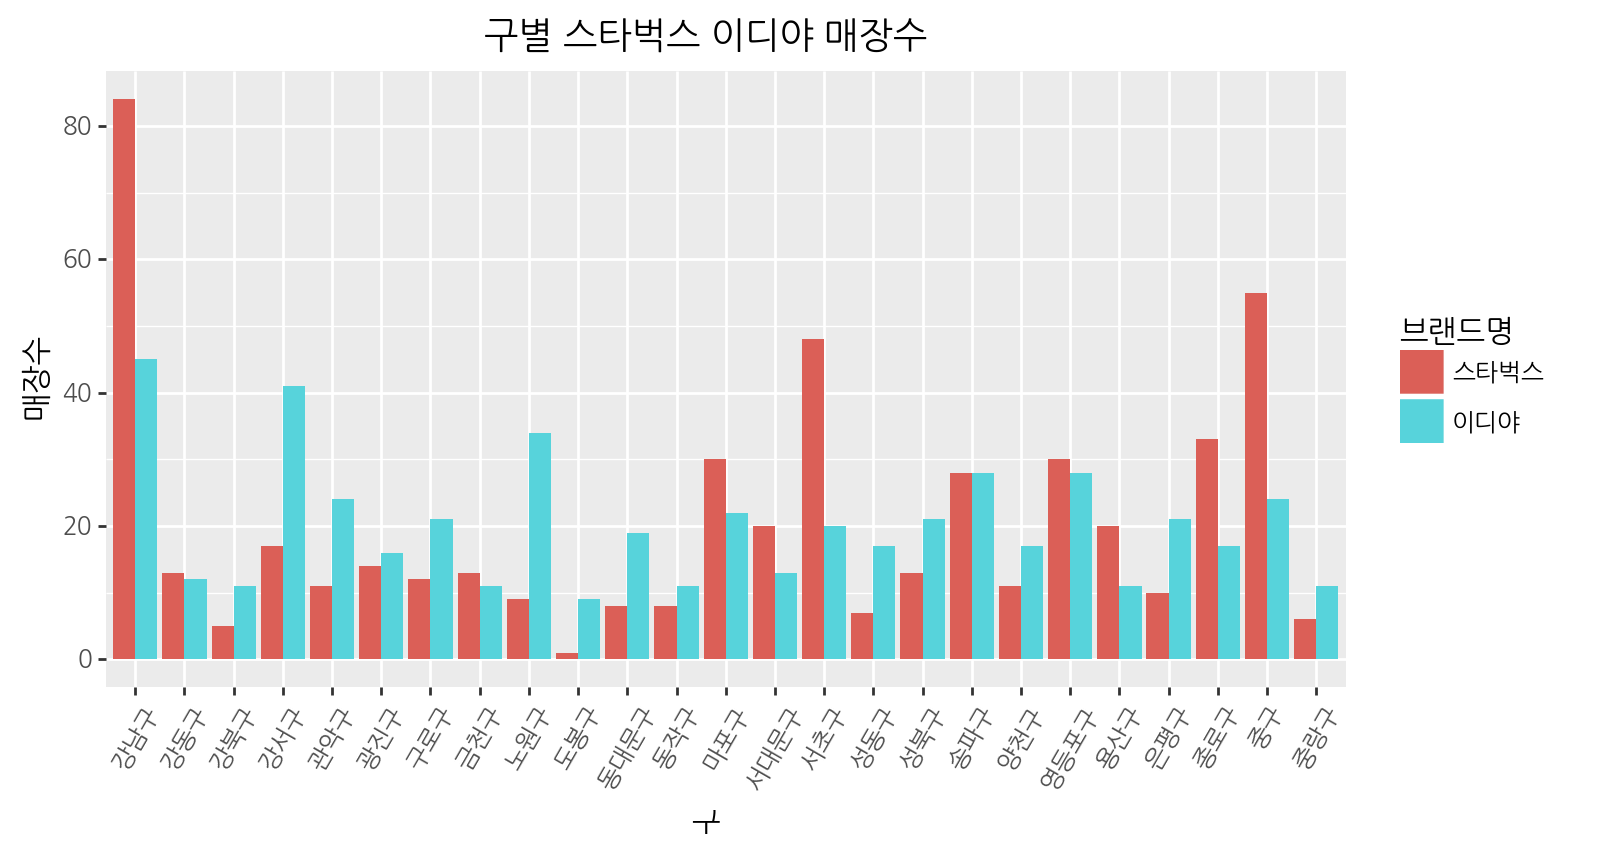

<ggplot: (-9223371878439909537)>

In [23]:
 (ggplot(cafe_brand)
  + aes(x='구', y='매장수', fill='브랜드명')
  + geom_bar(stat='identity', position='dodge')
  + ggtitle('구별 스타벅스 이디야 매장수')
  + theme(text=element_text(family='NanumGothic'),
         axis_text_x=element_text(rotation=60), 
         figure_size=(8, 4))
 )
# position='dodge' : 구에 따른 스타벅스, 이디야 매장수를 따로 보여준다

In [24]:
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     129
강동구      25
강북구      16
강서구      58
관악구      35
광진구      30
구로구      33
금천구      24
노원구      43
도봉구      10
동대문구     27
동작구      19
마포구      52
서대문구     33
서초구      68
성동구      24
성북구      34
송파구      56
양천구      28
영등포구     58
용산구      31
은평구      31
종로구      50
중구       79
중랑구      17
Name: 상호명, dtype: int64

# 행정구역별 스타벅스/이디야 매장합계 표현하기

## choropleth 그리기
* fill_color : http://colorbrewer2.org 참고

In [29]:
cafe_gu = pd.DataFrame(df_cafe.groupby(['시군구명'])['상호명'].count())
cafe_gu

상호명
시군구명     
강남구   129
강동구    25
강북구    16
강서구    58
관악구    35
광진구    30
구로구    33
금천구    24
노원구    43
도봉구    10
동대문구   27
동작구    19
마포구    52
서대문구   33
서초구    68
성동구    24
성북구    34
송파구    56
양천구    28
영등포구   58
용산구    31
은평구    31
종로구    50
중구     79
중랑구    17

In [25]:
import json

geo_path = 'data\seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding = 'utf-8'))

## 스타벅스 이디야 카페 매장 합계 분포

In [35]:
map = folium.Map(
    # 지도의 중심위치 선정
    location = [geo_df['위도'].mean(), geo_df['경도'].mean()],
    zoom_start=11)

map

In [36]:
map.choropleth(geo_data = geo_json,
               data = cafe_gu['상호명'],
               columns = [cafe_gu.index, cafe_gu['상호명']],# ['Data 1', 'Data 2']
               key_on = 'feature.properties.name', #'feature.properties.myvalue'
               fill_color = 'Purples',
               fill_opacity = 0.6,
               line_opacity = 0.2
              )
map

In [37]:
for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
      
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

### 스타벅스 매장 분포

In [40]:
starbucks = df_cafe[df_cafe['브랜드명'] == '스타벅스']
df_starbucks = pd.DataFrame(starbucks.groupby(['시군구명'])['상호명'].count())

df_starbucks.columns = ['매장수']
df_starbucks.head()

매장수
시군구명     
강남구    84
강동구    13
강북구     5
강서구    17
관악구    11

In [49]:
map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()],
                zoom_start = 11, tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_starbucks['매장수'],
               columns = [df_starbucks.index, df_starbucks['매장수']],# ['Data 1', 'Data 2']
               key_on = 'feature.properties.name', #'feature.properties.myvalue'
               fill_color = 'YlGn',
               fill_opacity = 0.6,
               line_opacity = 0.2
              )

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'    
      
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)
map

### 이디야 매장 분포

In [45]:
ediya = df_cafe[df_cafe['브랜드명'] == '이디야']
df_ediya = pd.DataFrame(ediya.groupby(['시군구명'])['상호명'].count())

df_ediya.columns = ['매장수']
df_ediya.head()

매장수
시군구명     
강남구    45
강동구    12
강북구    11
강서구    41
관악구    24

In [52]:
map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()],
                zoom_start = 11, tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_ediya['매장수'],
               columns = [df_ediya.index, df_ediya['매장수']],# ['Data 1', 'Data 2']
               key_on = 'feature.properties.name', #'feature.properties.myvalue'
               fill_color = 'PuBu',
               fill_opacity = 0.6,
               line_opacity = 0.2
              )

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '이디야' :
        icon_color = 'blue'    
      
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)
map